In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import math
import seaborn as sns           

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',1600)
pd.set_option('display.max_rows',1600)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,gradient_boosting

from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error


In [18]:
Mercedes_df=pd.read_csv('Mercedes.Csv')
Mercedes_df

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [19]:
Mercedes_df.shape

(4209, 378)

In [20]:
missing_value_df=pd.DataFrame({'Column_Name':Mercedes_df.columns,
                             'missing_value_count':Mercedes_df.isnull().sum(),
                             'missing_value_percent':Mercedes_df.isnull().sum()/Mercedes_df.shape[0]*100})

missing_value_df.sort_values(by='missing_value_percent',ascending=False)

cols_drop=list(missing_value_df[missing_value_df['missing_value_percent']>50]['Column_Name'])
#cols_drop

Mercedes_df.drop(columns=cols_drop,inplace=True)
Mercedes_df.shape
Mercedes_df

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [21]:
for col in Mercedes_df.columns:
    if Mercedes_df[col].nunique()==Mercedes_df.shape[0] or Mercedes_df[col].nunique()==1:
        cols_drop.append(col)
cols_drop

['ID',
 'X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [22]:
Mercedes_df.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [23]:
Mercedes_df.drop(columns=cols_drop,inplace=True)

In [24]:
Mercedes_df.shape

(4209, 365)

In [25]:
Mercedes_df.dtypes

y       float64
X0       object
X1       object
X2       object
X3       object
X4       object
X5       object
X6       object
X8       object
X10       int64
X12       int64
X13       int64
X14       int64
X15       int64
X16       int64
X17       int64
X18       int64
X19       int64
X20       int64
X21       int64
X22       int64
X23       int64
X24       int64
X26       int64
X27       int64
X28       int64
X29       int64
X30       int64
X31       int64
X32       int64
X33       int64
X34       int64
X35       int64
X36       int64
X37       int64
X38       int64
X39       int64
X40       int64
X41       int64
X42       int64
X43       int64
X44       int64
X45       int64
X46       int64
X47       int64
X48       int64
X49       int64
X50       int64
X51       int64
X52       int64
X53       int64
X54       int64
X55       int64
X56       int64
X57       int64
X58       int64
X59       int64
X60       int64
X61       int64
X62       int64
X63       int64
X64       int64
X65     

In [26]:
y=Mercedes_df[['y']]

In [27]:
Mercedes_df.drop(columns='y',inplace=True)

In [28]:
X=Mercedes_df

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, y, test_size=0.3,random_state=41)

In [30]:
from sklearn.preprocessing import LabelEncoder
import numpy as np


class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [31]:
le=LabelEncoderExt()

for col in X_train.columns:
    if X_train[col].dtype=='object':
        le.fit(X_train[col])
        X_train[col]=le.transform(X_train[col])
        X_test[col]=le.transform(X_test[col])

Text(0, 0.5, 'Explained Veriance ratio')

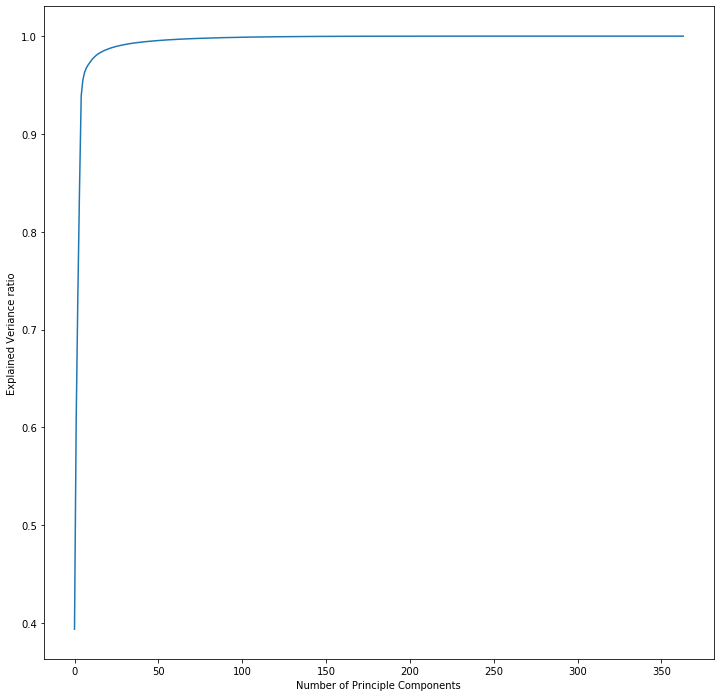

In [32]:
from sklearn.decomposition import PCA

pca=PCA()
X_train_pca_df=pd.DataFrame(pca.fit_transform(X_train))
plt.figure(figsize=(12,12))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Principle Components")
plt.ylabel("Explained Veriance ratio")

In [33]:
pca_1=PCA(n_components=50)

X_train_pca_df=pd.DataFrame(pca_1.fit_transform(X_train),columns=list(range(0,50)))
X_test_pca_df=pd.DataFrame(pca_1.transform(X_test))
X_train_pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,-11.351657,23.652965,-4.473080,-7.756454,-3.077467,-1.321824,-1.331671,-0.360624,0.372530,0.054951,1.129218,0.332920,1.656920,0.441881,1.248587,0.929523,-0.935276,0.406629,0.712320,0.017834,0.306629,-0.967812,0.216959,0.011745,0.359160,0.207946,0.355582,0.351645,-0.717832,-0.191123,-0.019396,0.122447,0.542981,-0.568863,-0.105013,0.305107,-0.095833,0.477304,0.192325,0.005758,0.031422,0.287450,0.551692,-0.053524,0.294902,0.335834,0.036023,0.000118,0.048846,-0.223136
1,-6.601484,0.365104,0.645208,-8.047392,0.129890,-2.083549,0.718911,-1.314628,-0.738602,-1.179670,-1.066984,0.152793,-0.418649,2.074438,0.283824,0.252723,-0.643631,0.736636,-0.020773,-0.569338,-0.209876,1.016449,-0.443511,0.307617,-0.097111,0.638578,0.579137,-0.264761,-0.662509,-0.221241,0.353815,-0.588086,0.256057,-0.738837,-0.495037,0.064716,0.248634,0.527319,-0.693609,-0.032247,0.976494,0.870776,-0.555771,0.094701,0.371730,0.217810,-0.073740,0.034482,0.182298,-0.820592
2,-14.410231,11.984301,3.340187,-12.908932,9.434252,7.208700,0.833877,1.106292,1.220615,-0.574461,0.005308,-0.330279,-1.251634,1.038463,0.837877,0.668094,-0.206581,0.381283,0.334606,0.128597,-0.466937,0.214620,-0.794546,-0.602709,0.306635,0.703258,0.834547,0.311764,-0.429011,0.987613,-0.329422,0.754341,0.082930,0.046275,-0.288581,0.050360,0.273005,0.157274,-0.060590,-0.198536,-0.099964,-0.106607,0.071473,0.067580,0.121359,-0.256800,0.045587,0.038733,-0.404215,0.324244
3,6.785924,-4.338290,-3.943690,-17.087531,1.850508,-0.063941,-0.370195,-1.813832,-0.137462,0.507219,1.433581,1.373210,-0.102991,-0.213791,1.469246,0.296079,0.217843,0.265801,-0.134499,-0.351178,0.011622,-0.007787,-0.092585,-0.113590,0.260209,0.161475,-0.531814,0.087390,0.015078,-0.177762,0.078225,-0.669556,0.200408,0.407621,0.094547,0.479784,0.153761,-0.435162,-0.377215,0.101660,0.374586,0.108597,-0.305240,0.424832,-0.266272,0.420006,0.154627,-0.082369,-0.106175,0.276948
4,-2.714815,4.454020,-4.036881,-13.180821,-5.020754,-1.839131,-0.615181,-0.450970,0.155693,0.210704,0.506033,0.702008,2.119921,-1.631199,0.030576,0.430160,0.208749,-0.868573,0.772066,0.288384,0.661742,-0.036528,0.472737,-1.215845,-0.368966,-0.213380,0.020510,-0.547839,-0.230604,-0.819891,0.504189,0.946117,-0.245493,0.144665,0.204913,-0.979521,0.128619,0.025237,-0.135151,-0.046655,0.248454,-0.263999,-0.062167,0.058115,-0.142625,-0.161760,0.077616,0.140435,0.323738,-0.242653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,13.974657,13.039233,-0.931354,-0.461334,7.825717,1.137741,-2.868075,2.005755,0.713032,-2.362258,-1.852460,3.030101,0.214757,-0.253228,-0.359052,-0.843298,0.229590,-0.251956,0.055902,-0.275337,0.344635,-0.165141,-0.002864,0.291928,0.497247,-0.309495,-0.565932,-0.010898,-0.793245,-0.233371,0.703671,-0.174208,0.021854,-0.116387,0.348205,0.035241,-0.417625,0.046573,0.167246,-0.127081,0.211394,-0.052377,-0.089398,-0.019462,0.028834,-0.169895,0.255531,0.047521,-0.247246,-0.111332
2942,22.111733,-8.004313,11.933618,-7.738826,9.568887,0.126563,1.040519,-1.404494,0.127817,0.002513,1.230452,-0.604982,0.688750,-0.162328,-1.045645,-1.090629,0.317254,0.204838,0.343263,-0.256193,0.361778,-0.372130,0.739614,-0.221425,0.074896,-0.641617,0.868677,-1.403765,-0.456342,-0.249212,-0.051183,-0.169010,-0.281034,-0.145110,-0.374428,-0.268526,0.875848,0.149518,0.202832,0.213210,-0.165635,0.299137,0.239224,-0.206641,0.370790,-0.215199,-0.024235,0.208885,-0.106067,0.220599
2943,-10.338046,2.763601,16.160774,-4.040158,-3.379069,-2.459125,3.139868,-3.028275,-1.503827,0.080984,-0.222735,1.048185,0.746515,0.618932,-0.316538,0.246679,0.863973,-0.041423,-0.888728,0.858761,-1.107145,0.310323,-0.450266,0.412288,0.629880,-0.282376,-0.536401,0.129036,-0.069677,0.279727,0.439384,-0.394355,-0.

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]

vif['Column Name']=X_train.columns

vif

,VIF Factor,Column Name
0,2.711929,X0
1,7.199941,X1
2,21.218050,X2
3,3.073882,X3
4,0.000000,X4
5,1.243064,X5
6,1.306515,X6
7,1.234229,X8
8,inf,X10
9,inf,X12


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_pca=pd.DataFrame()
vif_pca["VIF Factor_PCA"]=[variance_inflation_factor(X_train_pca_df.values,i)for i in range(X_train_pca_df.shape[1])]

vif_pca['Column Name']=X_train_pca_df.columns

vif_pca

,VIF Factor_PCA,Column Name
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,7
8,1.0,8
9,1.0,9


In [36]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()
linreg.fit(X_train_pca_df,Y_train)

linreg_pred=linreg.predict(X_test_pca_df)

linreg_pred

array([[ 93.8383895 ],
       [107.9451405 ],
       [110.92430101],
       ...,
       [104.0429197 ],
       [ 99.75692243],
       [ 96.36740147]])